<p>
  <a href="https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/5_visualization_data_exploration_vnstock3.ipynb" target="_blank" style="display:inline-block; vertical-align:middle; margin-left:8px;">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height:20px; vertical-align:middle;">
  </a>
  <a href="https://codespaces.new/thinh-vu/vnstock" target="_blank" style="display:inline-block; vertical-align:middle;">
    <img src="https://img.shields.io/badge/Open%20in-GitHub%20Codespaces-blue?logo=github" alt="Open in GitHub Codespaces" style="height:20px; vertical-align:middle;">
  </a>
</p>



# Mục lục

1. Chứng khoán Việt Nam [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/1_vietnam_stock_vnstock.ipynb)
2. Chứng khoán quốc tế: Forex, Crypto, Chỉ số [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/2_international_market.ipynb)
3. Dữ liệu Thị trường, hàng hoá [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/3_commodities_vnstock.ipynb)
4. Biểu diễn dữ liệu trực quan từ vnstock [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/5_visualization_data_exploration_vnstock.ipynb)

# I. Cài đặt

## Cài đặt thư viện

In [ ]:
!pip install -U vnstock

## Nạp thư viện lần đầu

> Bạn có thể nạp toàn bộ các module của thư viện vào môi trường làm việc nếu chưa biết rõ mình cần gì hoặc chọn từng module riêng biệt để nạp vào khi đã quen thuộc.

In [1]:
## Nạp toàn bộ thư viện
# from vnstock import *

## Nạp Wrapper làm việc chính (UI chính của thư viện)
from vnstock import Vnstock

# II. Biểu diễn & khám phá dữ liệu

## Dữ liệu mẫu

In [2]:
from vnstock import Quote
quote = Quote(symbol='ACB', source='VCI')
df = quote.history(start='2020-01-01', end='2024-12-31')
# Đặt cột 'time' làm cột index
df.set_index('time', inplace=True)
df

,open,high,low,close,volume
time,,,,,
2020-01-02,6.58,6.64,6.55,6.64,1163109
2020-01-03,6.64,6.70,6.61,6.64,1055528
2020-01-06,6.64,6.64,6.49,6.49,1286035
2020-01-07,6.49,6.55,6.49,6.49,1050934
2020-01-08,6.49,6.49,6.35,6.38,2304937
...,...,...,...,...,...
2024-12-25,20.89,21.39,20.85,21.26,9518178
2024-12-26,21.26,21.35,21.22,21.35,5583577
2024-12-27,21.39,21.47,21.31,21.35,7694895


In [3]:
intraday_df = quote.intraday(page_size=15000)
intraday_df

,time,price,volume,match_type,id
0,2025-08-01 09:15:00+07:00,23.0,200,Sell,334584286
1,2025-08-01 09:15:00+07:00,23.0,1000,Sell,334584328
2,2025-08-01 09:15:00+07:00,23.0,21800,Sell,334584329
3,2025-08-01 09:15:00+07:00,23.0,300,Sell,334584330
4,2025-08-01 09:15:00+07:00,23.0,100,Sell,334584331
...,...,...,...,...,...
3500,2025-08-01 14:45:00+07:00,23.0,500,Buy,335420622
3501,2025-08-01 14:45:00+07:00,23.0,1000,Buy,335420621
3502,2025-08-01 14:45:00+07:00,23.0,300,Buy,335420620
3503,2025-08-01 14:45:00+07:00,23.0,2000,Buy,335420627


In [4]:
from vnstock import Finance
finance = Finance(symbol='ACB', source='VCI')
income_df = finance.income_statement(period='year', lang='vi', dropna=True)
income_df = income_df.sort_values('Năm', ascending=True)
income_df.set_index('Năm', inplace=True)
income_df

,CP,Doanh thu (đồng),Tăng trưởng doanh thu (%),Lợi nhuận sau thuế của Cổ đông công ty mẹ (đồng),Tăng trưởng lợi nhuận (%),Thu nhập lãi và các khoản tương tự,Chi phí lãi và các khoản tương tự,Thu nhập lãi thuần,Thu nhập từ hoạt động dịch vụ,Chi phí hoạt động dịch vụ,...,Chi phí quản lý DN,LN từ HĐKD trước CF dự phòng,Chi phí dự phòng rủi ro tín dụng,LN trước thuế,Thuế TNDN,Chi phí thuế TNDN hiện hành,Chi phí thuế TNDN hoãn lại,Lợi nhuận thuần,Cổ đông của Công ty mẹ,Lãi cơ bản trên cổ phiếu
Năm,,,,,,,,,,,,,,,,,,,,,
2010,ACB,14960336000000,0.000000,2334794000000,0.000000,14960336000000,-10796566000000,4163770000000,967147000000,-140707000000,...,-2160020000000,3329658000000,-227410000000,3102248000000,-767454000000,-744589000000,-22865000000,2334794000000,2334794000000,2861
2011,ACB,25460938000000,0.701896,3207841000000,0.373929,25460938000000,-18853380000000,6607558000000,1138535000000,-313003000000,...,-3147466000000,4499069000000,-296376000000,4202693000000,-994852000000,-994852000000,0,3207841000000,3207841000000,3280
2013,ACB,15384473000000,-0.395762,826493000000,-0.742352,15384473000000,-10818660000000,4565813000000,817243000000,-226223000000,...,-3759397000000,1890190000000,-854630000000,1035560000000,-209067000000,-201214000000,-7853000000,826493000000,826493000000,868
2014,ACB,13702832000000,-0.109308,951802000000,0.151615,13702832000000,-8937199000000,4765633000000,944682000000,-250242000000,...,-3824041000000,2094715000000,-879314000000,1215401000000,-263599000000,-271093000000,7494000000,951802000000,951802000000,1021
2015,ACB,14081792000000,0.027656,1028232000000,0.080300,14081792000000,-8198265000000,5883527000000,1020989000000,-275763000000,...,-4021683000000,2198606000000,-884455000000,1314151000000,-285919000000,-283828000000,-2091000000,1028232000000,1028232000000,1136
2016,ACB,16448249000000,0.168051,1325174000000,0.288789,16448249000000,-9556360000000,6891889000000,1274131000000,-329749000000,...,-4677889000000,2884613000000,-1217587000000,1667026000000,-341852000000,-338590000000,-3262000000,1325174000000,1325174000000,1293
2017,ACB,20319639000000,0.235368,2118131000000,0.598380,20319639000000,-11861885000000,8457754000000,1574668000000,-386337000000,...,-6217359000000,5221550000000,-2565343000000,2656207000000,-538076000000,-556141000000,18065000000,2118131000000,2118131000000,1578
2018,ACB,24015362000000,0.181879,5137052000000,1.425276,24015362000000,-13652442000000,10362920000000,2094599000000,-597073000000,...,-6712217000000,7320982000000,-932411000000,6388571000000,-1251519000000,-1299419000000,47900000000,5137052000000,5137052000000,3076
2019,ACB,28317522000000,0.179142,6009937000000,0.169919,28317522000000,-16205362000000,12112160000000,2708759000000,-812267000000,...,-8307596000000,7789757000000,-273821000000,7515936000000,-1505999000000,-1463537000000,-42462000000,6009937000000,6009937000000,2780


In [19]:
from vnstock import Company
company = Company(symbol='BID', source='tcbs')
shareholders_df = company.shareholders()
# replace share_own_percent in Khác row in share_holder column by 100 - sum of other rows
shareholders_df.loc[shareholders_df['share_holder'] == 'Khác', 'share_own_percent'] = 1 - shareholders_df['share_own_percent'].sum()
shareholders_df

,share_holder,share_own_percent
0,The State Bank Of Vietnam,0.7956
1,"KEB Hana Bank, Co., Ltd.",0.1474
2,Other,0.0213


In [21]:
profile_df = company.profile()
profile_df

,symbol,company_name,company_profile,history_dev,company_promise,business_risk,key_developments,business_strategies
0,BID,Joint Stock Commercial Bank for Investment and...,Joint Stock Commercial Bank for Investment and...,"April 26, 1957: Formerly known as Bank for C...",,Circular 36/2014/TT-NHNN also caused some di...,Account service Mobilizing capital service; ...,"Proactively restructure sources of funds, in..."


## Biểu diễn xu hướng

### Time series (Line)

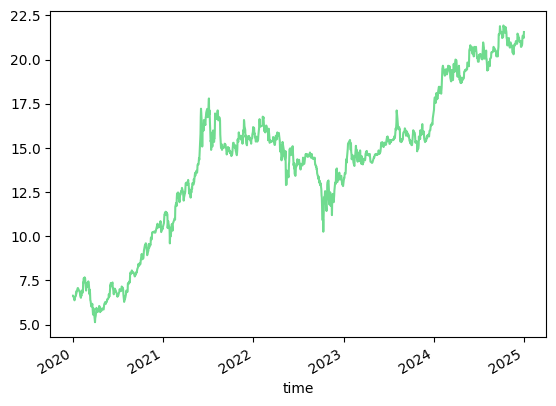

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time'>)

In [22]:
# Vẽ biểu đồ đơn giản, sử dụng tuỳ chọn mặc định
df['close'].viz.timeseries()

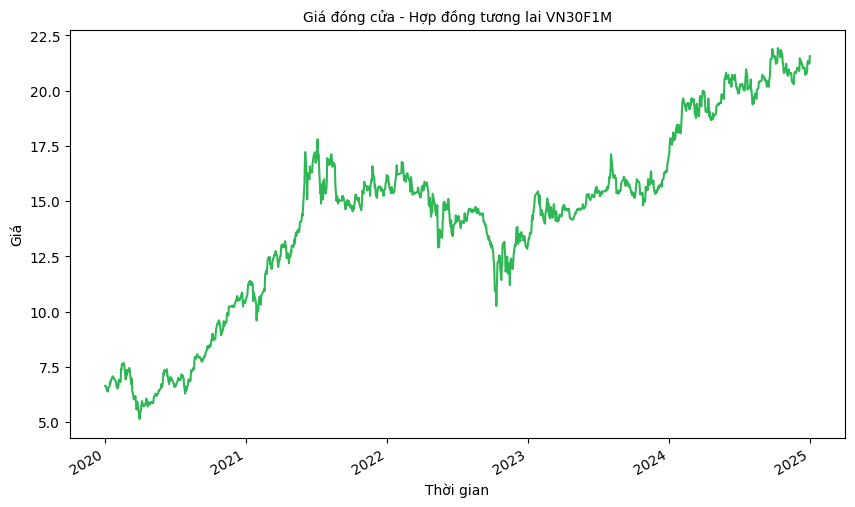

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Giá đóng cửa - Hợp đồng tương lai VN30F1M'}, xlabel='Thời gian', ylabel='Giá'>)

In [23]:
# Mở help cho biểu đồ timeseries để xem tất cả các tuỳ chọn
df['close'].viz.timeseries(figsize=(10, 6), 
                           title='Giá đóng cửa - Hợp đồng tương lai VN30F1M', 
                           ylabel='Giá', 
                           xlabel='Thời gian',
                           color_palette='vnstock',
                           palette_shuffle=True)

In [24]:
df.viz.help('timeseries')


        Biểu diễn dữ liệu theo thời gian (timeseries). Dữ liệu cần có cột index là kiểu dữ liệu datetime.

        Tham số:
            - data (pd.DataFrame hoặc pd.Series): Dữ liệu đầu vào dạng DataFrame hoặc Series.
            - title (str): Tiêu đề của biểu đồ.
            - title_fontsize (int): Cỡ chữ cho tiêu đề.
            - xlabel (str): Nhãn cho trục X.
            - ylabel (str): Nhãn cho trục Y.
            - color_palette (str): Tên của bảng màu đã được định trước hoặc danh sách các màu tùy chỉnh. Mặc định là 'vnstock'. Các bảng màu có sẵn: 'percentage', 'amount', 'category', 'trend', 'flatui', 'vnstock', 'learn_anything'. Có thể liệt kê tất cả bảng màu với Utils.brand_palettes.keys().
            - palette_shuffle (bool): Xáo trộn thứ tự màu sắc trong bảng màu, cho phép chọn màu ngẫu nhiên trong bảng màu để biểu diễn cho đến khi bạn ưng ý. Mặc định là False.
            - grid (bool): Hiển thị lưới. Nhận True để hiện thị hoặc False để ẩn lưới.
            - data_labels 

## Combo chart

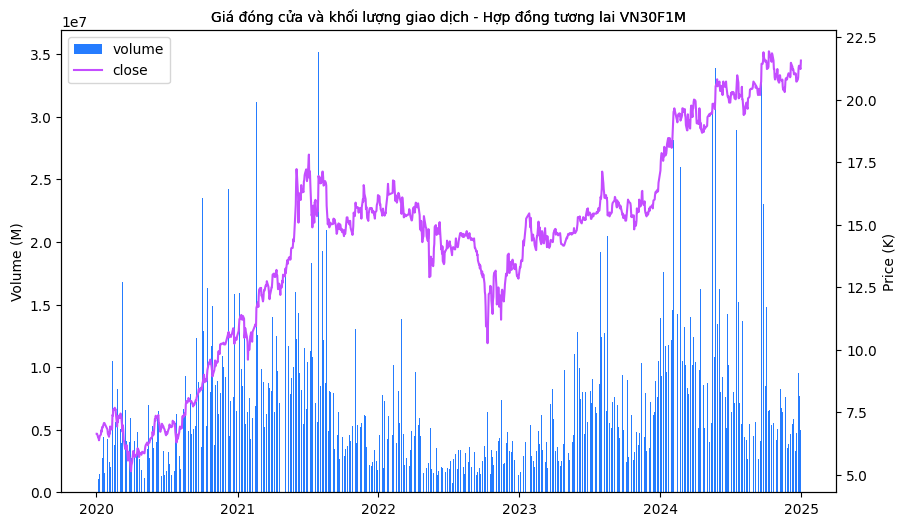

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30F1M'}, ylabel='Volume (M)'>,
 <Axes: title={'center': 'Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30F1M'}, ylabel='Price (K)'>)

In [25]:
# Mở help cho biểu đồ combo để xem tất cả các tuỳ chọn
df.viz.combo(bar_data='volume',
             line_data='close',
             title='Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30F1M',
             left_ylabel='Volume (M)', right_ylabel='Price (K)',
             figsize=(10, 6),
             color_palette='stock',
             palette_shuffle=True)

## Biểu diễn số lượng

### Table

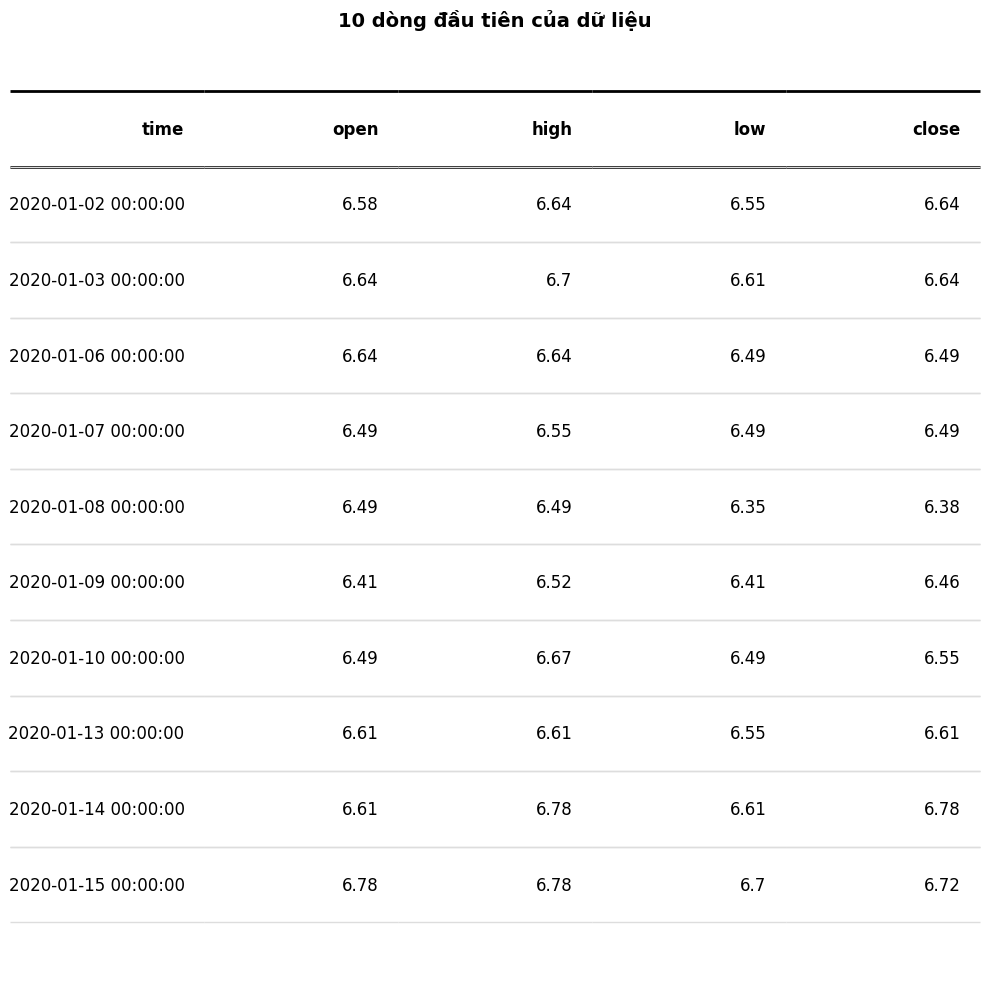

In [26]:
# Mở help cho table để xem tất cả các tuỳ chọn
df.reset_index().iloc[:10, :5]\
    .viz.table(figsize=(10, 10),
               title='10 dòng đầu tiên của dữ liệu',
               title_loc='center')

In [27]:
df.viz.help('table')


            Plot a table using matplotlib.
            Parameters:
            
            data (DataFrame): Dữ liệu cần biểu diễn
            columns (list, optional): Các cột cần hiển thị. Mặc định là None.
            title (str, optional): Tiêu đề của bảng. Mặc định là "".
            title_loc (str, optional): Tiêu đề của bảng. Mặc định là "left".
            header (bool, optional): Tùy chọn hiển thị header - hàng tiêu đề. Mặc định là True.
            colWidths (list, optional): Chiều rộng của các cột. Mặc định là None.
            rowLoc (str, optional): Vị trí hiển thị dữ liệu của các hàng. Mặc định là "right".
            colLoc (str, optional): Vị trí hiển thị dữ liệu của các cột. Mặc định là "right".
            colLabels (list, optional): Tiêu đề của các cột. Mặc định là None.
            edges (str, optional): Cạnh của bảng. Mặc định là "horizontal".
            orient (str, optional): Hướng của bảng. Mặc định là "horizontal".
            figsize (tuple, optional): Kích

### Barplot

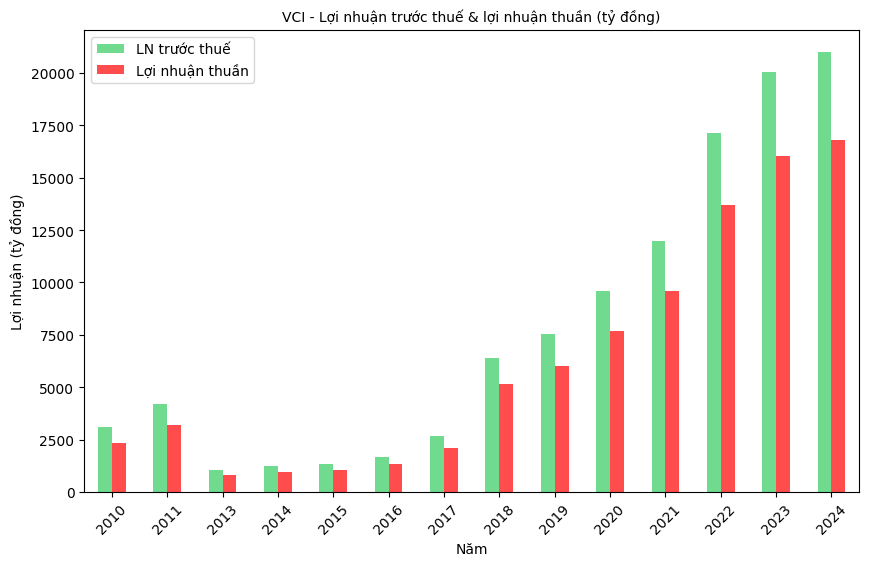

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'VCI - Lợi nhuận trước thuế & lợi nhuận thuần (tỷ đồng)'}, xlabel='Năm', ylabel='Lợi nhuận (tỷ đồng)'>)

In [28]:
# Mở help cho biểu đồ bar để xem tất cả các tuỳ chọn
income_df[['LN trước thuế', 'Lợi nhuận thuần']].div(1000_000_000)\
    .viz.bar(figsize=(10, 6), 
             title='VCI - Lợi nhuận trước thuế & lợi nhuận thuần (tỷ đồng)', 
             ylabel='Lợi nhuận (tỷ đồng)', 
             xlabel='Năm', 
             color_palette='stock',
             data_labels=False, # Hiển thị giá trị trên cột
             show_legend=True,
             rot=45) # Xoay nhãn trục x 45 độ

### Heatmap

In [29]:
df['returns'] = df['close'].pct_change() * 100

Bạn có thể sử dụng các tham số cài đặt cho Heatmap do Seaborn hỗ trợ [tại đây](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

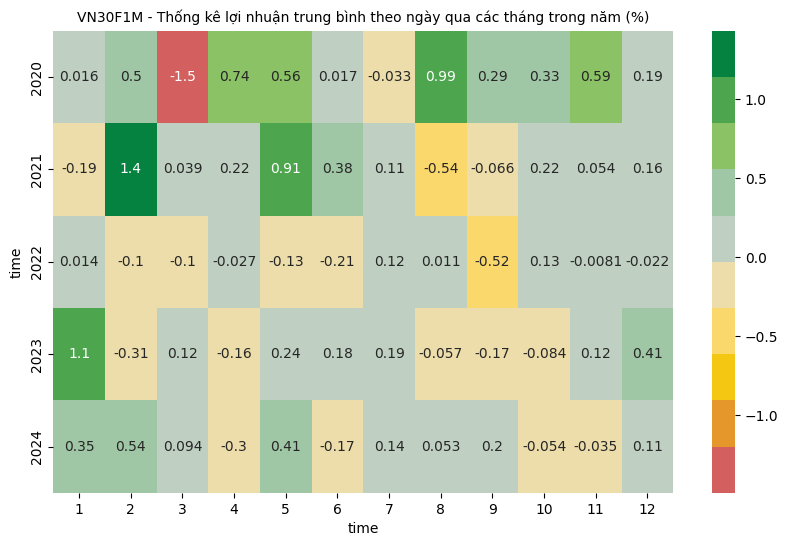

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'VN30F1M - Thống kê lợi nhuận trung bình theo ngày qua các tháng trong năm (%)'}, xlabel='time', ylabel='time'>)

In [30]:
# Mở help cho biểu đồ heatmap để xem tất cả các tuỳ chọn
import pandas as pd
return_pivot = pd.pivot_table(df, index=df.index.year, columns=df.index.month, values='returns', aggfunc='mean')
cmap = df.viz.create_cmap('percentage') # Tạo colormap bằng 1 bảng màu có trong vnstock_ezchart
return_pivot.viz.heatmap(figsize=(10, 6),
                         title='VN30F1M - Thống kê lợi nhuận trung bình theo ngày qua các tháng trong năm (%)',
                         annot=True,
                         cmap=cmap)

In [31]:
df.viz.help('heatmap')


        Biểu diễn dữ liệu dưới dạng biểu đồ nhiệt (heatmap).

        Tham số:
            - data (pd.DataFrame): Dữ liệu đầu vào dạng DataFrame.
            - title (str): Tiêu đề của biểu đồ.
            - font_name (str): Tên của font chữ muốn áp dụng.
            - figsize (tuple): Kích thước của biểu đồ, ví dụ (10, 6).
            - xlim (tuple): Giới hạn cho trục X, ví dụ (0, 100).
            - ylim (tuple): Giới hạn cho trục Y, ví dụ (0, 100).
            - title_fontsize (int): Cỡ chữ cho tiêu đề.
            - background_color (str): Màu nền cho biểu đồ.
        


## Biểu diễn phân phối

### Histogram

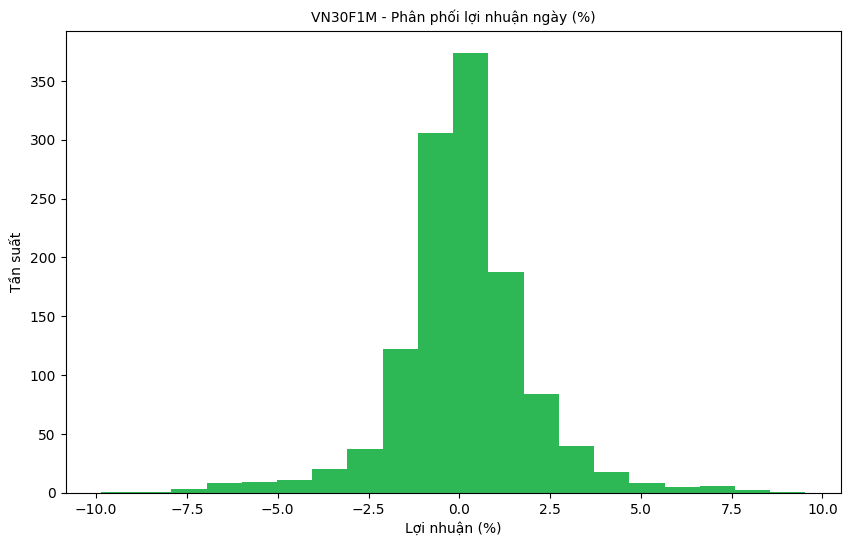

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'VN30F1M - Phân phối lợi nhuận ngày (%)'}, xlabel='Lợi nhuận (%)', ylabel='Tần suất'>)

In [32]:
# Mở help cho biểu đồ histogram để xem tất cả các tuỳ chọn
df['returns'].viz.hist(bins=20,
                       figsize=(10, 6),
                       title='VN30F1M - Phân phối lợi nhuận ngày (%)',
                       xlabel='Lợi nhuận (%)',
                       ylabel='Tần suất',
                       color_palette='stock')

### Boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


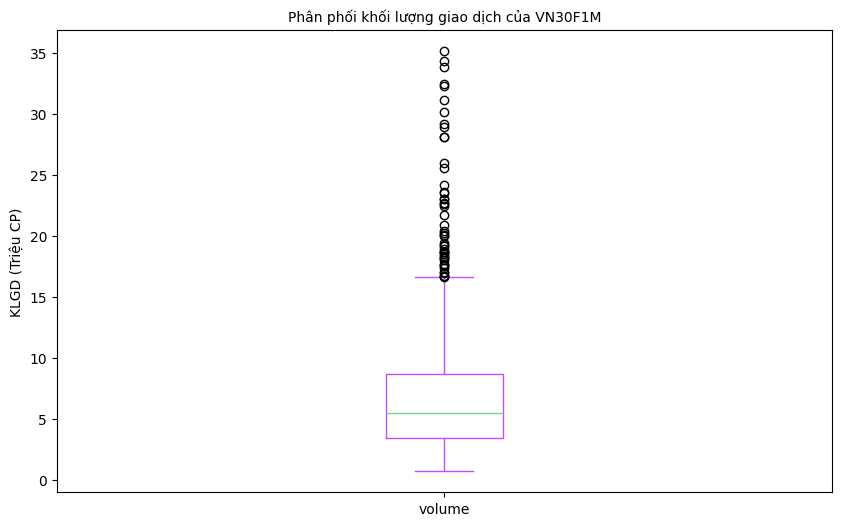

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Phân phối khối lượng giao dịch của VN30F1M'}, ylabel='KLGD (Triệu CP)'>)

In [33]:
# Mở help cho biểu đồ boxplot để xem tất cả các tuỳ chọn
df.volume.div(1000_000)\
    .viz.boxplot(
        title='Phân phối khối lượng giao dịch của VN30F1M', 
        xlabel='', 
        ylabel='KLGD (Triệu CP)', 
        color_palette='stock', 
        palette_shuffle=True,
        figsize=(10, 6))

### Wordcloud

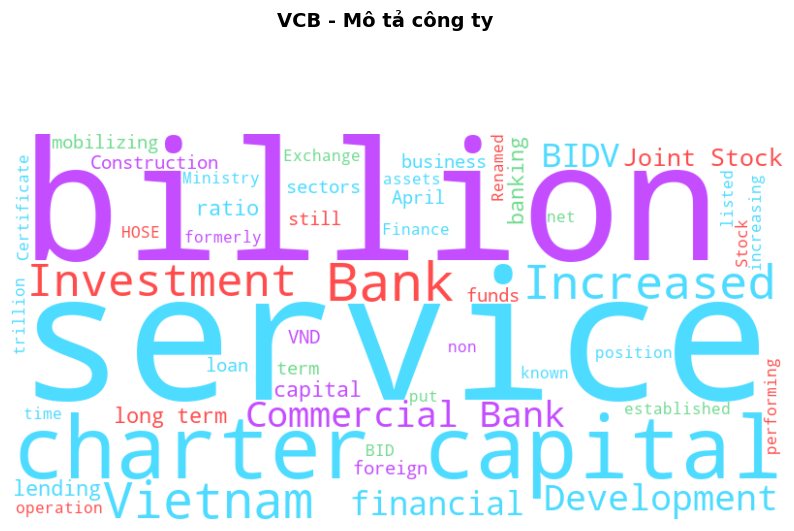

In [34]:
profile_df.viz.wordcloud(figsize=(10, 6), 
                         title='VCB - Mô tả công ty',
                         max_words=50,
                         color_palette='stock')

In [35]:
profile_df

,symbol,company_name,company_profile,history_dev,company_promise,business_risk,key_developments,business_strategies
0,BID,Joint Stock Commercial Bank for Investment and...,Joint Stock Commercial Bank for Investment and...,"April 26, 1957: Formerly known as Bank for C...",,Circular 36/2014/TT-NHNN also caused some di...,Account service Mobilizing capital service; ...,"Proactively restructure sources of funds, in..."


## Biểu diễn tỉ lệ

### Pie chart

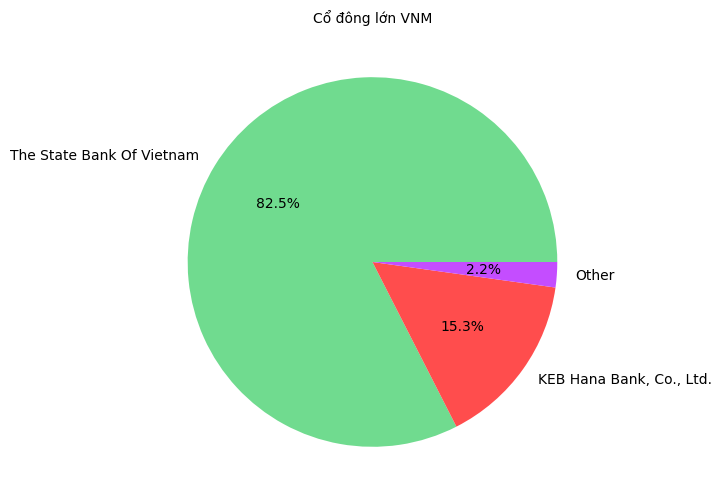

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cổ đông lớn VNM'}>)

In [36]:
shareholders_df.viz.pie(title='Cổ đông lớn VNM',
                                             labels='share_holder',
                                             values='share_own_percent',
                                             figsize=(10, 6),
                                             ylabel='',
                                             color_palette='stock')

In [37]:
df.viz.help('pie')


        Biểu diễn dữ liệu dưới dạng biểu đồ tròn (pie chart).

        Tham số:
            - data (pd.DataFrame hoặc pd.Series): Dữ liệu đầu vào dạng DataFrame hoặc Series.
            - labels (list): Nhãn cho từng phần của biểu đồ tròn.
            - title (str): Tiêu đề của biểu đồ.
            - color_palette (str): Tên của bảng màu đã được định trước hoặc danh sách các màu tùy chỉnh. Mặc định là 'vnstock'. Các bảng màu có sẵn: 'percentage', 'amount', 'category', 'trend', 'flatui', 'vnstock', 'learn_anything'. Có thể liệt kê tất cả bảng màu với Utils.brand_palettes.keys().
            - palette_shuffle (bool): Xáo trộn thứ tự màu sắc trong bảng màu, cho phép chọn màu ngẫu nhiên trong bảng màu để biểu diễn cho đến khi bạn ưng ý. Mặc định là False.
            - legend_title (str): Tiêu đề cho chú giải.
            - series_names (list): Danh sách tên cho các dải (series) dữ liệu trong biểu đồ. Nhận giá trị là 1 danh sách (list).
            - figsize (tuple): Kích thước của biểu đ

### Treemap

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

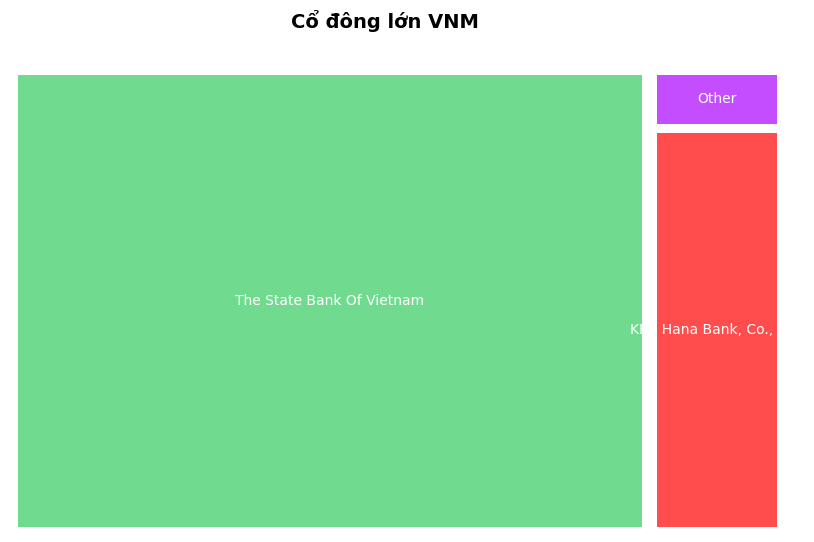

In [38]:
shareholders_df.viz.treemap(title='Cổ đông lớn VNM',
                            labels='share_holder',
                            values='share_own_percent',
                            figsize=(10, 6),
                            color_palette='stock')

In [39]:
df.viz.help('treemap')


        Vẽ biểu đồ treemap.
        Tham số:
            - values (series): Dải dữ liệu cần vẽ dạng List hoặc Pandas Series
            - labels (list): Nhãn cho từng phần của biểu đồ treemap
            - title (str): Tiêu đề của biểu đồ
            - color_palette (str): Tên của bảng màu đã được định trước hoặc danh sách các màu tùy chỉnh. Mặc định là 'vnstock'. Các bảng màu có sẵn: 'percentage', 'amount', 'category', 'trend', 'flatui', 'vnstock', 'learn_anything'. Có thể liệt kê tất cả bảng màu với Utils.brand_palettes.keys().
            - palette_shuffle (bool): Xáo trộn thứ tự màu sắc trong bảng màu, cho phép chọn màu ngẫu nhiên trong bảng màu để biểu diễn cho đến khi bạn ưng ý. Mặc định là False.
            - figsize (tuple): Kích thước của biểu đồ, ví dụ (10, 6).
            - title_fontsize (int): Cỡ chữ cho tiêu đề.
            - fontsize: Kích thước chữ bên trong biểu đồ. Mặc định là 10
            - color: Màu chữ, mặc định là 'white'.
        


## Biểu diễn tương quan

### Scatter plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


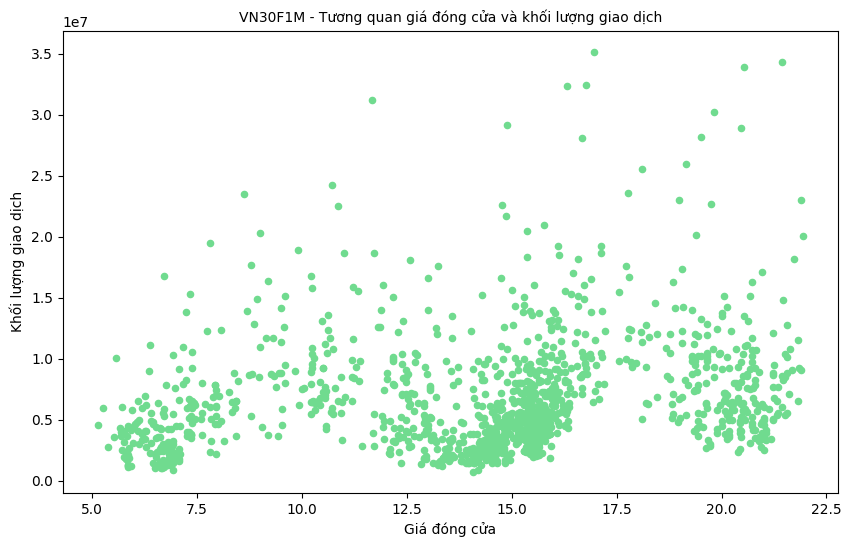

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'VN30F1M - Tương quan giá đóng cửa và khối lượng giao dịch'}, xlabel='Giá đóng cửa', ylabel='Khối lượng giao dịch'>)

In [40]:
df.viz.scatter(x='close', y='volume',
               title='VN30F1M - Tương quan giá đóng cửa và khối lượng giao dịch',
               xlabel='Giá đóng cửa',
               ylabel='Khối lượng giao dịch',
               figsize=(10, 6),
               color_palette='stock')

### Pairplot

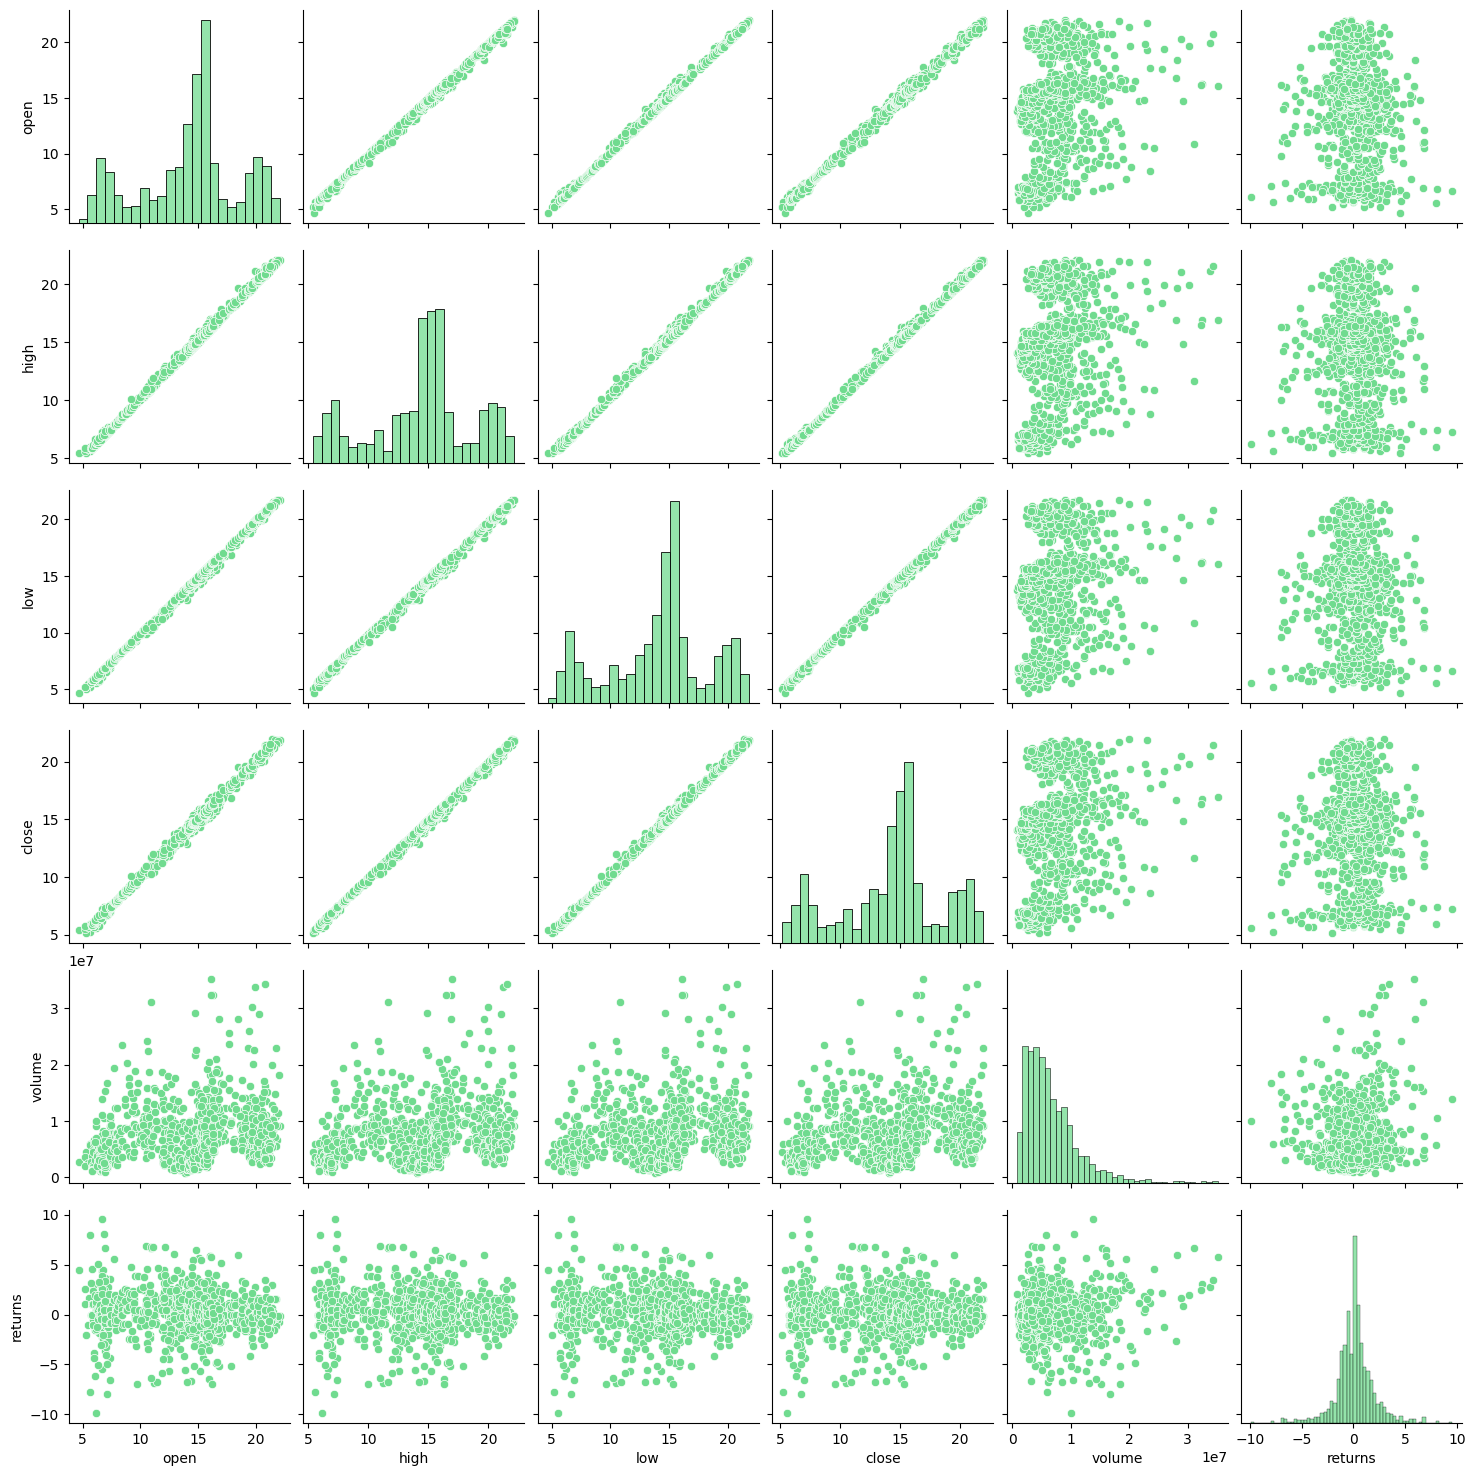

In [41]:
df.viz.pairplot()